In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn.metrics import average_precision_score, precision_recall_curve, PrecisionRecallDisplay, auc, roc_curve


# 2D model

In [3]:
ground_truth_path = r"D:/deepfakes/data/test/labels.csv"
results_path = r"D:/deepfakes/src/inference/predictions/final_efficient_net4.csv"

In [4]:
target_names = ["REAL", "FAKE"]

In [9]:
results = pd.read_csv(results_path)

In [10]:
results

,filename,label
0,4000.mp4,0.990000
1,4001.mp4,0.990000
2,4002.mp4,0.990000
3,4003.mp4,0.569241
4,4004.mp4,0.017729
...,...,...
3995,7995.mp4,0.063486
3996,7996.mp4,0.070172
3997,7997.mp4,0.022141
3998,7998.mp4,0.951619


## Prepare Data for evaluation

In [11]:
ground_truth = pd.read_csv(ground_truth_path)

In [12]:
ground_truth

,filename,label
0,4000.mp4,1
1,4001.mp4,1
2,4002.mp4,1
3,4003.mp4,0
4,4004.mp4,0
...,...,...
3995,7995.mp4,0
3996,7996.mp4,0
3997,7997.mp4,0
3998,7998.mp4,1


In [13]:
truth_labels = ground_truth["label"].values
predicted_labels = results["label"].values

In [21]:
assert len(truth_labels) == len(predicted_labels)

# Loss

In [22]:
loss = log_loss(truth_labels, predicted_labels)
loss

0.42374769489204506

# Average Precision and ROC

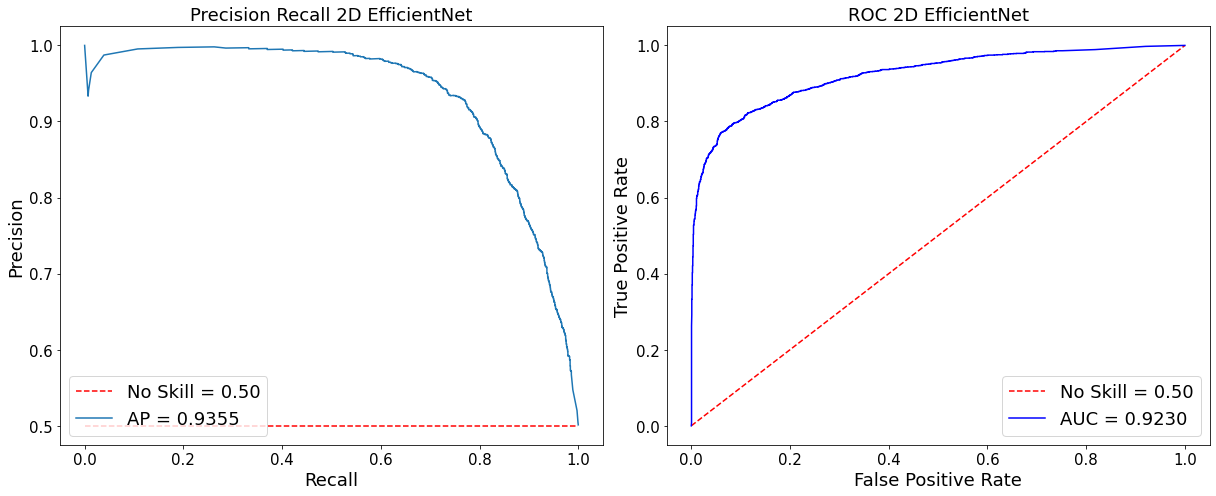

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))
# plt.tick_params(axis='both', which='minor', labelsize=18)

# Precision Recall
average_precision = average_precision_score(truth_labels, predicted_labels)
precision, recall, _ = precision_recall_curve(truth_labels, predicted_labels)
no_skill = 0.5
ax1.set_title("Precision Recall 2D EfficientNet", fontsize=18)
ax1.plot([0, 1], [no_skill, no_skill], 'r--', linestyle='--', label='No Skill = %0.2f' % 0.5)
ax1.plot(recall, precision, label = 'AP = %0.4f' % average_precision)
ax1.legend(loc = 'lower left', prop={'size': 18})
ax1.set_ylabel('Precision', fontsize=18)
ax1.set_xlabel('Recall', fontsize=18)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)

# ROC
fpr, tpr, threshold = roc_curve(truth_labels, predicted_labels)
roc_auc = auc(fpr, tpr)
ax2.set_title('ROC 2D EfficientNet', fontsize=18)
ax2.plot([0, 1], [0, 1],'r--', label='No Skill = %0.2f' % 0.5)
ax2.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
ax2.legend(loc = 'lower right', prop={'size': 18})
ax2.set_ylabel('True Positive Rate', fontsize=18)
ax2.set_xlabel('False Positive Rate', fontsize=18)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)

# plt.subplot_tool()
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
fig.tight_layout()
plt.savefig('EfficientNet2D.png', dpi=300, bbox_inches='tight')
# plt.show()

In [16]:
# change to zeros and 1s
for i in range(len(predicted_labels)):
    if predicted_labels[i] > 0.5:
        predicted_labels[i] = 1
    else:
        predicted_labels[i] = 0

In [17]:
cm = confusion_matrix(truth_labels, predicted_labels)

In [18]:
cm

array([[1915,   85],
       [ 550, 1450]], dtype=int64)

<AxesSubplot:>

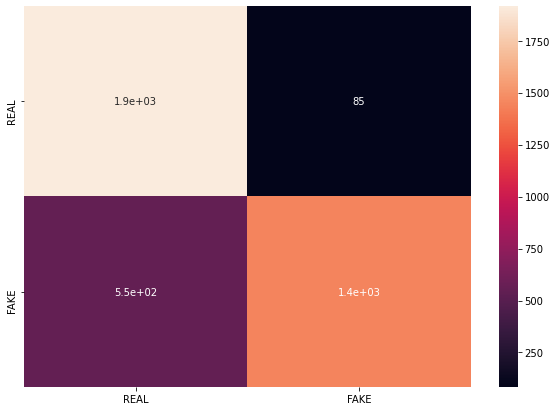

In [19]:
df_cm = pd.DataFrame(cm, index = target_names,
                  columns = target_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [20]:
print("Classification report for deepfake classifier:\n%s\n"
      % (classification_report(truth_labels, predicted_labels, target_names=target_names)))

Classification report for deepfake classifier:
              precision    recall  f1-score   support

        REAL       0.78      0.96      0.86      2000
        FAKE       0.94      0.72      0.82      2000

    accuracy                           0.84      4000
   macro avg       0.86      0.84      0.84      4000
weighted avg       0.86      0.84      0.84      4000




# 3D model

In [2]:
results_3D = r"D:/deepfakes/src/inference/scores_efficient_net4_3D.csv"

In [29]:
df_3D = pd.read_csv(results_3D)
predicted_labels_3D = df_3D["prediction"].values

In [30]:
loss_3D_model = log_loss(truth_labels, predicted_labels_3D)
loss_3D_model

0.3970306712840544

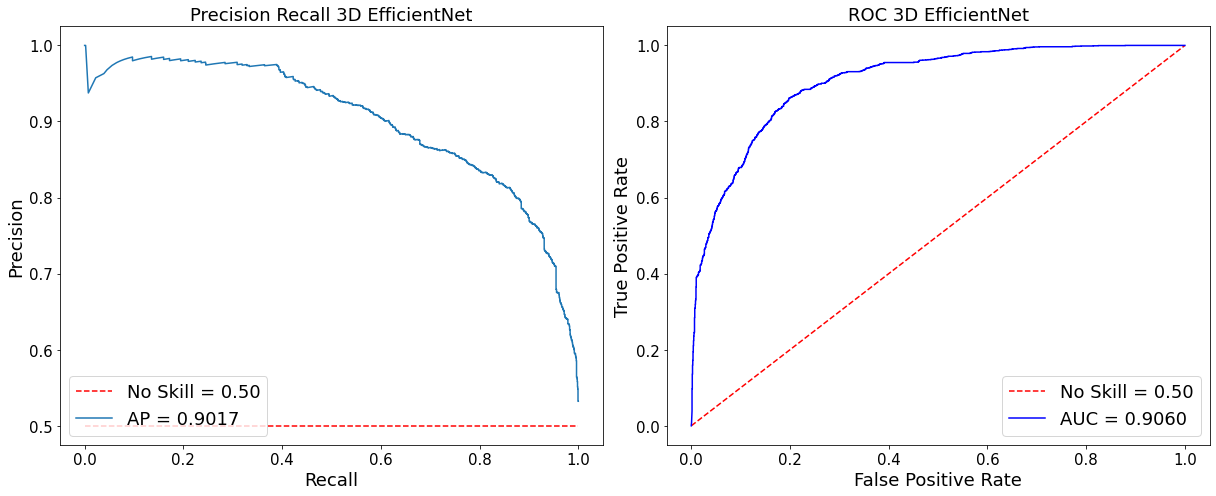

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))
# plt.tick_params(axis='both', which='minor', labelsize=18)

# Precision Recall
average_precision = average_precision_score(truth_labels, predicted_labels_3D)
precision, recall, _ = precision_recall_curve(truth_labels, predicted_labels_3D)
no_skill = 0.5
ax1.set_title("Precision Recall 3D EfficientNet", fontsize=18)
ax1.plot([0, 1], [no_skill, no_skill], 'r--', linestyle='--', label='No Skill = %0.2f' % 0.5)
ax1.plot(recall, precision, label = 'AP = %0.4f' % average_precision)
ax1.legend(loc = 'lower left', prop={'size': 18})
ax1.set_ylabel('Precision', fontsize=18)
ax1.set_xlabel('Recall', fontsize=18)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)

# ROC
fpr, tpr, threshold = roc_curve(truth_labels, predicted_labels_3D)
roc_auc = auc(fpr, tpr)
ax2.set_title('ROC 3D EfficientNet', fontsize=18)
ax2.plot([0, 1], [0, 1],'r--', label='No Skill = %0.2f' % 0.5)
ax2.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
ax2.legend(loc = 'lower right', prop={'size': 18})
ax2.set_ylabel('True Positive Rate', fontsize=18)
ax2.set_xlabel('False Positive Rate', fontsize=18)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)

# plt.subplot_tool()
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
fig.tight_layout()
plt.savefig('EfficientNet3D.png', dpi=300, bbox_inches='tight')
# plt.show()

In [28]:
# change to zeros and 1s
for i in range(len(predicted_labels_3D)):
    if predicted_labels_3D[i] > 0.5:
        predicted_labels_3D[i] = 1
    else:
        predicted_labels_3D[i] = 0

In [29]:
cm = confusion_matrix(truth_labels, predicted_labels_3D)

<AxesSubplot:>

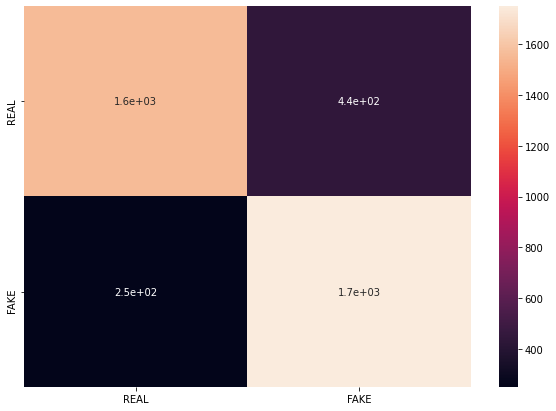

In [30]:
df_cm = pd.DataFrame(cm, index = target_names,
                  columns = target_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [31]:
print("Classification report for deepfake classifier:\n%s\n"
      % (classification_report(truth_labels, predicted_labels, target_names=target_names)))

Classification report for deepfake classifier:
              precision    recall  f1-score   support

        REAL       0.78      0.96      0.86      2000
        FAKE       0.94      0.72      0.82      2000

    accuracy                           0.84      4000
   macro avg       0.86      0.84      0.84      4000
weighted avg       0.86      0.84      0.84      4000




## Combine

In [27]:
predicted_labels_3D = pd.read_csv(results_3D).prediction.values
predicted_labels_2D = pd.read_csv(results_path).label.values
predicted_labels_2D_DropRandom = pd.read_csv(r"scores_efficient_net4_dropoutrandom.csv").label.values

In [28]:
combined_labels = (predicted_labels_2D + predicted_labels_3D + predicted_labels_2D_DropRandom) / 3

In [29]:
combined_labels

array([0.99000009, 0.9897513 , 0.98701743, ..., 0.01649987, 0.94668355,
       0.99000005])

In [30]:
loss_combined = log_loss(truth_labels, combined_labels)
# This is very good result
loss_combined

0.2988264212235432

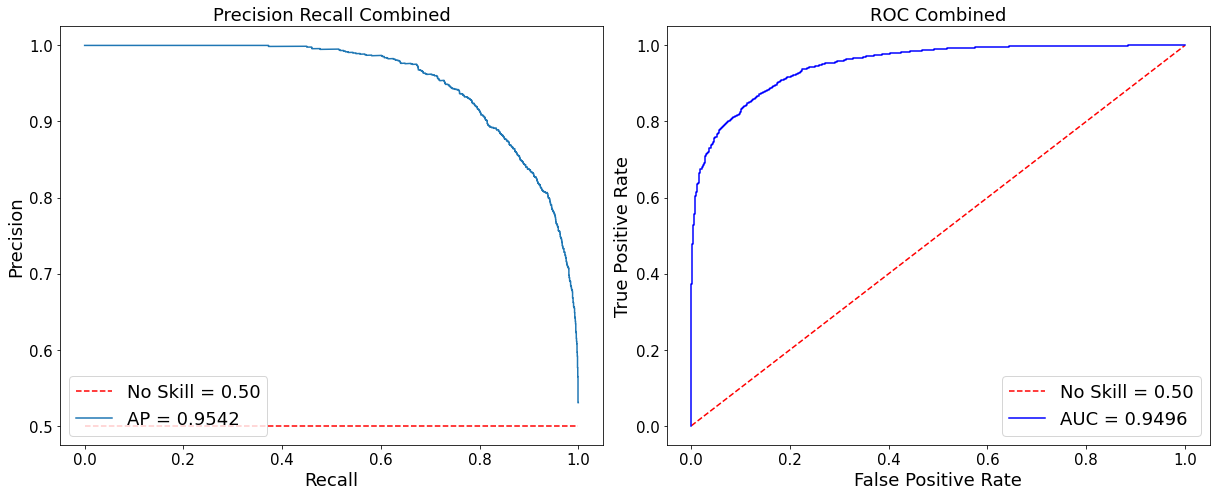

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))
# plt.tick_params(axis='both', which='minor', labelsize=18)

# Precision Recall
average_precision = average_precision_score(truth_labels, combined_labels)
precision, recall, _ = precision_recall_curve(truth_labels, combined_labels)
no_skill = 0.5
ax1.set_title("Precision Recall Combined", fontsize=18)
ax1.plot([0, 1], [no_skill, no_skill], 'r--', linestyle='--', label='No Skill = %0.2f' % 0.5)
ax1.plot(recall, precision, label = 'AP = %0.4f' % average_precision)
ax1.legend(loc = 'lower left', prop={'size': 18})
ax1.set_ylabel('Precision', fontsize=18)
ax1.set_xlabel('Recall', fontsize=18)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)

# ROC
fpr, tpr, threshold = roc_curve(truth_labels, combined_labels)
roc_auc = auc(fpr, tpr)
ax2.set_title('ROC Combined', fontsize=18)
ax2.plot([0, 1], [0, 1],'r--', label='No Skill = %0.2f' % 0.5)
ax2.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
ax2.legend(loc = 'lower right', prop={'size': 18})
ax2.set_ylabel('True Positive Rate', fontsize=18)
ax2.set_xlabel('False Positive Rate', fontsize=18)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)

# plt.subplot_tool()
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
fig.tight_layout()
plt.savefig('Combined_3.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
# change to zeros and 1s
for i in range(len(combined_labels)):
    if combined_labels[i] > 0.5:
        combined_labels[i] = 1
    else:
        combined_labels[i] = 0

In [43]:
cm = confusion_matrix(truth_labels, combined_labels)

<AxesSubplot:>

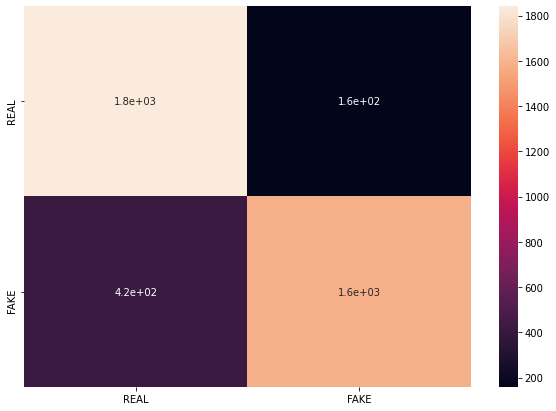

In [44]:
df_cm = pd.DataFrame(cm, index = target_names,
                  columns = target_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [45]:
print("Classification report for deepfake classifier:\n%s\n"
      % (classification_report(truth_labels, combined_labels, target_names=target_names)))

Classification report for deepfake classifier:
              precision    recall  f1-score   support

        REAL       0.82      0.92      0.86      2000
        FAKE       0.91      0.79      0.85      2000

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000




### 3 Methods combined (3d, pair face and coviar)